# Compuation of empirical cumulative cores mass functions
## Leonardo Testi - 8 Jun 2016 - GoCAS

+ Objective: compare observed and simulated ECCMF
+ Input data: 
    - observed cores mass list from *masse_new.dat*
    - simulated cores mu=2 from *masse_simul/mass_mu2_xy.dat* (also available *xz* and *yz* versions)
    - simulated cores mu=200 from *masse_simul/mass_mu200_xy.dat* (also available *xz* and *yz* versions)
+ Method: plot the ECCMF and compute Anderson-Darling test

In [36]:
# Initial setup: reading packages and setting global parameters

from readcol import *
import numpy as np
import aplpy as apl
from cutout import *
import matplotlib
import matplotlib.pyplot as plt
import astropy.io.fits as aif
from astropy import wcs 
import statsmodels.api as sm
import scipy.stats as ss
%matplotlib inline 
matplotlib.rcParams['axes.linewidth'] = 2.5
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.size'] = 24

obs_eccmf_file = 'masse_new.dat'
obs_eccmf_file = 'fluxes-peak.dat'
mod_dir = 'masse_simul'
proj = ['xy','xz','yz']
#proj = ['yz']
obs_eccmf_mu2 = []
obs_eccmf_mu200 = []
base_name = 'masse_mu'
base_name = 'fluxes-peak-mu'
for i in xrange(len(proj)):
    obs_eccmf_mu2.append(mod_dir+'/'+base_name+'2_'+proj[i]+'.dat')
    obs_eccmf_mu200.append(mod_dir+'/'+base_name+'200_'+proj[i]+'.dat')


r_ad_2 = Anderson_ksampResult(statistic=3.4552254876313158, critical_values=array([ 0.325,  1.226,  1.961,  2.718,  3.752]), significance_level=0.012939641473925081)
r_ad_200 = Anderson_ksampResult(statistic=8.0031913811584552, critical_values=array([ 0.325,  1.226,  1.961,  2.718,  3.752]), significance_level=0.0004263543152466397)
r_ad_2 = Anderson_ksampResult(statistic=3.7448581532899539, critical_values=array([ 0.325,  1.226,  1.961,  2.718,  3.752]), significance_level=0.010092150424039594)
r_ad_200 = Anderson_ksampResult(statistic=6.0024399487850646, critical_values=array([ 0.325,  1.226,  1.961,  2.718,  3.752]), significance_level=0.0016819592320203656)
r_ad_2 = Anderson_ksampResult(statistic=1.2798328778517643, critical_values=array([ 0.325,  1.226,  1.961,  2.718,  3.752]), significance_level=0.09583931386718389)
r_ad_200 = Anderson_ksampResult(statistic=6.5786736096640954, critical_values=array([ 0.325,  1.226,  1.961,  2.718,  3.752]), significance_level=0.00110951145905696

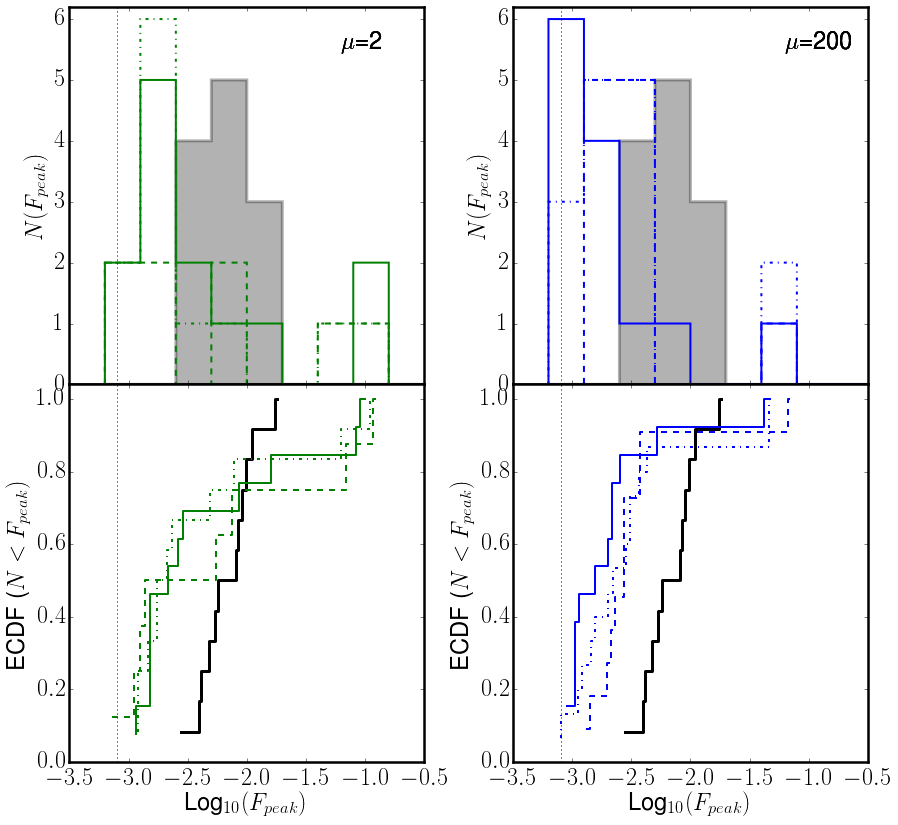

In [38]:
# Read files with data
bins = numpy.linspace(-1.5, 1.5, 10)
bins = numpy.linspace(-3.2, -0.5, 10)

ymin = [0.,0.]
ymax = [6.2, 1.04]

#def plhist(m,col,fc,alph=1.0,lwt=1,stf=False):
#    ax1.hist(mdms_stars, bins, color=col, facecolor=fcol, lw=lwt, alpha=0.3, histtype=stf)
#    #ax1.hist(mdms_stars_b2, bins, alpha=1.0, color='g',histtype='step', linestyle='solid', lw=3)
#    #ax1.hist(mdms_bds, bins, alpha=1.0, color='r',histtype='step', linestyle='solid', lw=3)
#
#
#    #ax1.set_xlabel(r"Log$_{10}$(M$_{disk}$/M$_\star$)")
#    #ax1.set_ylabel(r"N(M$_{disk}$/M$_\star$)")


def dopl(mm, col, lwt, malp=1.0, stf='step', column=0, linest='solid', plotlim=True, 
         lim=np.log10(0.8e-3), dolabel=False, lab='None'):
    eccdf = sm.distributions.ECDF(mm)
    x = np.linspace(min(mm), max(mm))
    if dolabel:
        ax[0][column].text(-1.2,5.5,lab,fontsize=24)
    if plotlim:
        ax[0][column].plot([lim,lim],[ymin[0],ymax[0]], linestyle='dotted', color='k')
        ax[1][column].plot([lim,lim],[ymin[1],ymax[1]], linestyle='dotted', color='k')
    ax[0][column].hist(mm, bins, color=col, facecolor=col, lw=lwt, alpha=malp, histtype=stf, linestyle=linest)
    ax[1][column].step(x, eccdf(x), color=col, lw=lwt, linestyle=linest)
    #if column > 0:
    #    ax[0][column].get_yaxis().set_ticks([])
    #    ax[1][column].get_yaxis().set_ticks([])
    ax[1][column].set_xlabel(r"Log$_{10}(F_{peak})$")
    ax[1][column].set_xlabel(r"Log$_{10}(F_{peak})$")
    ax[1][column].set_ylabel("ECDF ($N<F_{peak})$")
    ax[0][column].set_ylabel("$N(F_{peak})$")
    ax[0][column].set_ylim(ymin[0],ymax[0])
    ax[1][column].set_ylim(ymin[1],ymax[1])
    return x, eccdf

fig, ax = plt.subplots(2, 2, sharex=True, sharey=False, squeeze=True, figsize=(13,12))
#ax1.set_xlim(0.001,0.05)
#ax1.set_ylim(0,6.5)

#nam,pl,f,th,d,m = readcol(obs_eccmf_file,6,format='A,F,F,F,F,F',skipline=2,verbose=False)
nam,f,th,d,m = readcol(obs_eccmf_file,5,format='A,F,F,F,F',skipline=4,verbose=True)
#eccdf_obs = sm.distributions.ECDF(m)
#x_m = np.linspace(min(m), max(m))
#plt.step(x_m, eccdf_obs(x_m), color='black', lw=3)
lm=np.log10(m)
#lm = np.copy(m)
x_m, eccdf_obs = dopl(lm, 'black', 3, malp=0.3, stf='stepfilled',column=0, plotlim=True)
x_m, eccdf_obs = dopl(lm, 'black', 3, malp=0.3, stf='stepfilled',column=1, plotlim=True)

som = np.sort(lm)
lines = ['solid','dashdot','dashed']
for i in xrange(len(proj)):
    nam2,f2,th2,d2,m2 = readcol(obs_eccmf_mu2[i],5,format='A,F,F,F,F',skipline=2,verbose=False)
    lm2=np.log10(m2[np.where(f2 > 0.00007)])
    #lm2=np.copy(m2)
    x_m_2, eccdf_sim_2 = dopl(lm2, 'green', 2, column=0, linest=lines[i], plotlim=False, dolabel=True, lab=r'$\mu$=2')
    som_2 = np.sort(lm2)
    nam200,f200,th200,d200,m200 = readcol(obs_eccmf_mu200[i],5,format='A,F,F,F,F',skipline=2,verbose=False)
    lm200=np.log10(m200[np.where(f200 > 0.00007)])
    #lm200=np.copy(m200)
    x_m_200, eccdf_sim_200 = dopl(lm200, 'blue', 2, column=1, linest=lines[i], plotlim=False, dolabel=True, lab=r'$\mu$=200')
    som_200 = np.sort(lm200)
    r_ad_2 = ss.anderson_ksamp([som, som_2])
    print("r_ad_2 = {0}".format(r_ad_2))
    r_ad_200 = ss.anderson_ksamp([som, som_200])
    print("r_ad_200 = {0}".format(r_ad_200))

fig.tight_layout()
fig.subplots_adjust(hspace=0,wspace=0.25)
fig.savefig('f_peakflux.pdf')

#plt.show()


## Conclusion of this analysis
The case with mu=200 has lower peak values for the whole populations, while 1 or 2 fragments have higher peak than the observed one. The mu=2 case has a broader distribution of values. Both distributions are somewhat different from the observed one, it seems.

The Anderson-Darling ksamp test, based on the implementation in the scipy.stats package, gives the following results:

mu=2     p~1.3%; ~1.0%; 9.5%
mu=200   p~0.04%; ~0.16%; 0.11%

These numbers imply that all the mu=200 cases can be excluded as being drawn from the same parent distribution as the observed values with a confidence level exceeding 99.8% (or greater than 3sigma in standard/normal interpretation, which I am not sure applies here).

The mu=2 case is less obvious. Two projections could be excluded at a 98-99% confidence level, while the thirs projection with a null hypothesis probability of ~90% cannot be excluded at the 2-sigma level.